In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Physical Constants
C = 2.99792458e10 #Speed of light in cm/s
me = 9.10938356e-28 #Electron mass in grams
e = 4.80320425e-10 #Electron charge in statcoulombs.

In [3]:
#Input Parameters
mu = 1 #Ratio of the mass of the positive species to the negative species
mi = me*mu #Mass of ions (positive species)
sigmae = 10 #Magnetization Parameters for electrons (negative species)
sigmai = sigmae/mu #and ions (positive species)
ei = e*1 #Charge of ions
beta = 0.3 #Value of v/c where v is the drift speed of current sheet (Value is from Werner et al.)
gamma = 1/np.sqrt(1-beta**2) #Lorentz Factor of Current Sheet Moving at Drfit Speed beta.
eSD = 0.0004 #Electron Skin Depth
#eSd = C/omega = c/sqrt(4*pi*n*e**2/m)
#omega = Plasma Frequency.
ne = C**2*me/(4*np.pi*eSD**2*e**2) #Number Density of Background Electrons in terms of electron skin depth.
ni = ne #Number Density of Background Ions
bToD = 5 #Background particle density to drift particle density ratio is 1/5.
nde = ne * bToD #Drift Particle Electron Density
ndi = ni * bToD #As above for ions.

In [10]:
#Simulation Parameters
B0 = np.sqrt(4*np.pi*sigmae*ne*me*C**2) #Relationship between magnetic field and "cold" background  cplasma energy density.
#sigmae=B0**2/(4*np.pi*n*me*C**2))
#Relevant for setting up Harris Sheet B0 and J0.

thetae = sigmae/200 #Temeprature Parameter T/mc^2 for background electrons. Relevant for initializing Maxwell-Juttner distribution.
thetai = thetae/mu #As above for background ions.
#(ne*Ti + ni*Ti)/(B0**2/(8*pi)) = 4*thetae/sigmae = 1/50 << 1, such that the magnetic pressure dominates over the thermal pressure (from Werner et al.)

rhoe0 = me*C**2/(B0*e) #Standard Larmor Radius for electrons.
rhoi0 = mi*C**2/(B0*ei) #As above for ions.
rhoc = sigmae*rhoe0 #Larmor radius of electron with associatged magnetic energy sigmae*me*c**2. Relevant to determining simluation size.
omegac = C/rhoc #Larmor frequency of an electron with the Larmor radius rhoc.
#The length and time scales of Werner et al. are given in terms of rhoc and omegac.

L = 120*rhoc #In Werner et al. the simulation box is 2L in the direction perpendicular to the current sheet and L in the other direction.

#The Pressure Balance: (nde  * thetade * me + ndi * thetadi * mi) c**2 / gamma = B0**2 / (8*pi)
thetade = (gamma/4)*(ne/nde)*sigmai #By the above pressure balance.
thetadi = thetade/mu
#Apmere's Law: B0/delta = (4 * pi / c) *  e * (nde + ndi) * Beta * c
delta = 2*(thetade/(gamma*beta)*rhoe0) #Half thickness of current sheet, derived from Apmere's law and the pressure balance.

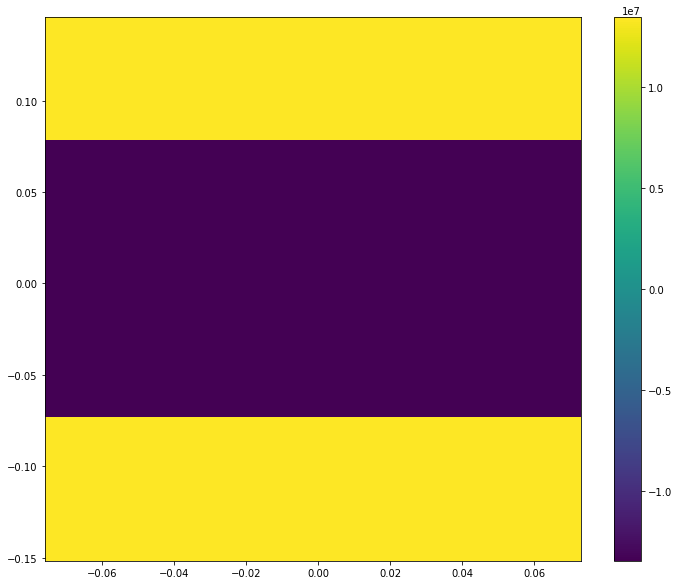

In [14]:
#B0 Plot
l = 120*rhoc
dx = dy = rhoc/16
x = np.arange(-l/2,l/2,l/50)
y = np.arange(-l,l,2*l/50)
u,v=np.meshgrid(x,y)
u = B0*np.tanh((v - (l/2))/delta)*np.heaviside(v,1) - B0*np.tanh((v + (l/2))/delta)*np.heaviside(-v,1)
im=plt.pcolormesh(x,y,u)
plt.gcf().colorbar(im)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(12,10)

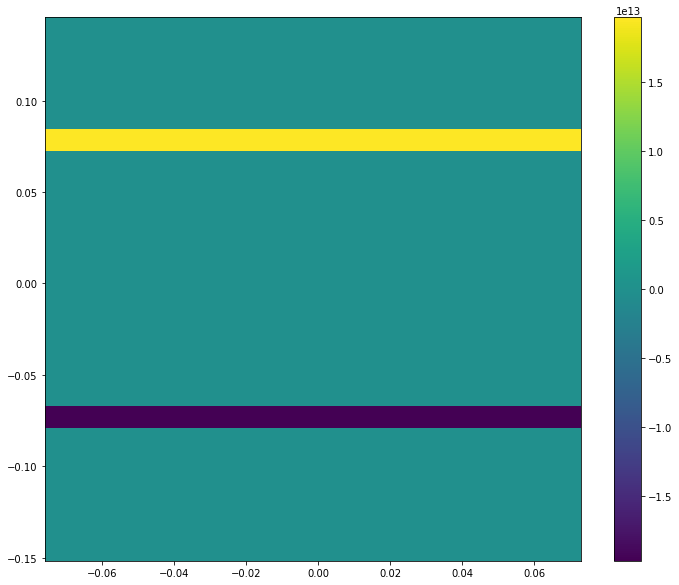

In [6]:
#ne0 Plot
l = 120*rhoc
dx = dy = rhoc/16
x = np.arange(-l/2,l/2,l/50)
y = np.arange(-l,l,2*l/50)
u,v=np.meshgrid(x,y)
u = nde*np.cosh((v-l/2)/delta)**-2*np.heaviside(v,1) - nde*np.cosh((v+l/2)/delta)**-2*np.heaviside(-v,1)
im=plt.pcolormesh(x,y,u)
plt.gcf().colorbar(im)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(12,10)